#Gold Price Prediction Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#1. Load and Prepare Data

In [3]:
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    df.rename(columns={col: 'Price' for col in df.columns if 'Price' in col}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df = df.sort_values('Date')
    df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
    return df

#2. Feature Engineering

In [4]:
def add_features(df):
    df['Previous_Close'] = df['Price'].shift(1)
    df['Daily_Return_%'] = df['Price'].pct_change() * 100
    df['MA_5'] = df['Price'].rolling(window=5).mean()
    df['MA_10'] = df['Price'].rolling(window=10).mean()
    df['MA_30'] = df['Price'].rolling(window=30).mean()
    
    # Exponential Moving Averages (EMA)
    
    df['EMA_5'] = df['Price'].ewm(span=5, adjust=False).mean()
    df['EMA_10'] = df['Price'].ewm(span=10, adjust=False).mean()
    df['EMA_30'] = df['Price'].ewm(span=30, adjust=False).mean()
    df['Next_Close'] = df['Price'].shift(-1)
    df.dropna(inplace=True)
    return df

#3. Train Linear Regression

In [5]:
def train_model(df):
    features = ['Price', 'Previous_Close', 'Daily_Return_%', 'MA_5', 'MA_10', 'MA_30', 'EMA_5', 'EMA_10', 'EMA_30']
    X = df[features]
    y = df['Next_Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_test, y_test

#4. Evaluate the Model

In [6]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("\nModel Evaluation Metrics")
    print("-------------------------")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    return y_test, y_pred

#5. Visualizations

In [9]:
def plot_results(y_test, y_pred):
    
    # Scatter Plot: Actual vs Predicted
    
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.5, color='teal', label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
    plt.title("Actual vs Predicted Gold Prices", fontsize=14, fontweight='bold')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Line Chart: Actual vs Predicted (First 100)
   
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:100], label='Actual', color='gold')
    plt.plot(y_pred[:100], label='Predicted', color='blue')
    plt.title("Predicted vs Actual Gold Price (First 100 Samples)", fontsize=14, fontweight='bold')
    plt.xlabel("Index")
    plt.ylabel("Gold Price")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#6. Run the Full Pipeline


Model Evaluation Metrics
-------------------------
MSE: 257.76
RMSE: 16.05
R² Score: 0.9987


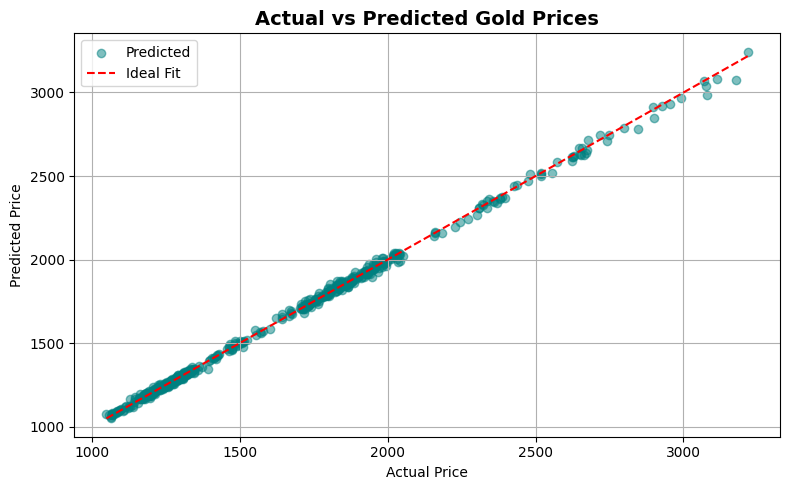

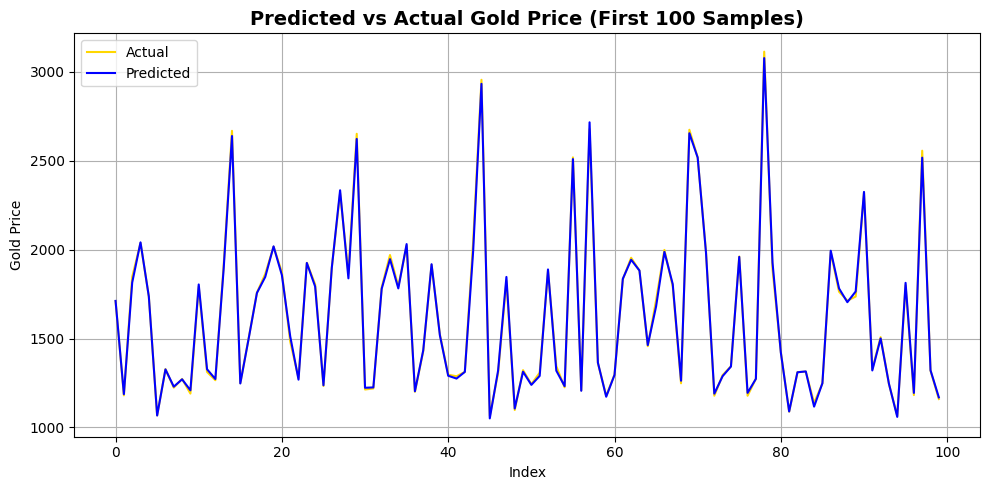

In [10]:
def main():
    file_path = r"C:\Users\Aakanksha\OneDrive\Desktop\Project\Gold-Price-Prediction-ML\data\Gold_Futures_Historical_Data_2014-2025.csv"

    df = load_and_prepare_data(file_path)
    df = add_features(df)
    model, X_test, y_test = train_model(df)
    y_test, y_pred = evaluate_model(model, X_test, y_test)
    plot_results(y_test, y_pred)
    
if __name__ == "__main__":
    main()
